In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

 - Load the dataset and explore the variables 

In [2]:
df = pd.read_csv('customer_churn.csv',sep=",")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

In [4]:
df.shape

(7043, 21)

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

 - Extract the target variable 

In [6]:
#We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges
target = df['Churn']
target

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [7]:
df.Churn.unique()

array(['No', 'Yes'], dtype=object)

In [8]:
#I realize its basically the same info as before but Im not sure when to use each
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [9]:
target.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [10]:
variables = ['tenure', 'SeniorCitizen','MonthlyCharges']
features = df[variables]
features

,tenure,SeniorCitizen,MonthlyCharges
0,1,0,29.85
1,34,0,56.95
2,2,0,53.85
3,45,0,42.30
4,2,0,70.70
...,...,...,...
7038,24,0,84.80
7039,72,0,103.20
7040,11,0,29.60
7041,4,1,74.40


In [11]:
#Lets merge those sets
df2=pd.concat([features,target],axis=1)
df2

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,1,0,29.85,No
1,34,0,56.95,No
2,2,0,53.85,Yes
3,45,0,42.30,No
4,2,0,70.70,Yes
...,...,...,...,...
7038,24,0,84.80,No
7039,72,0,103.20,No
7040,11,0,29.60,No
7041,4,1,74.40,Yes


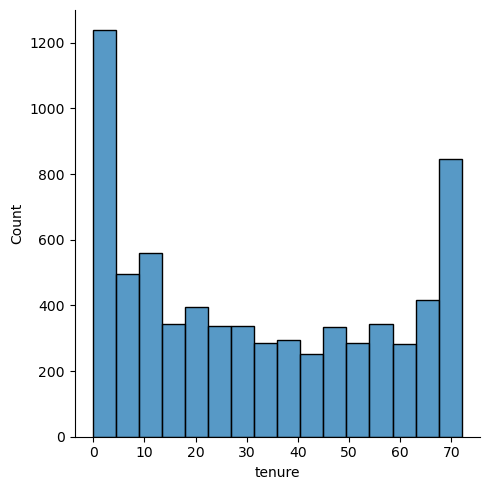

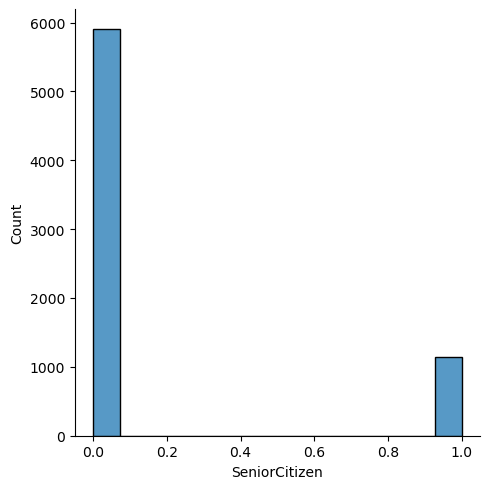

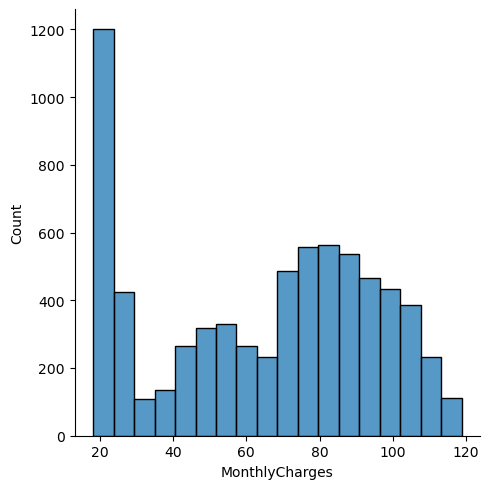

In [12]:
for col in df2.select_dtypes(np.number):
    sns.displot(df2[col])
    plt.show()

 - Build the logistic regression model

In [13]:
count = df2['Churn'].value_counts()

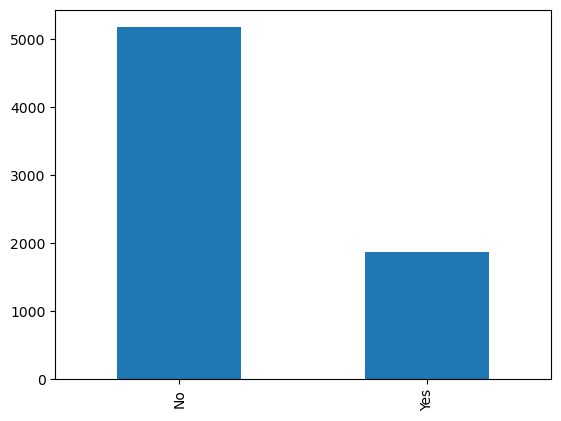

In [14]:
df2['Churn'].value_counts().plot(kind='bar')
plt.show()

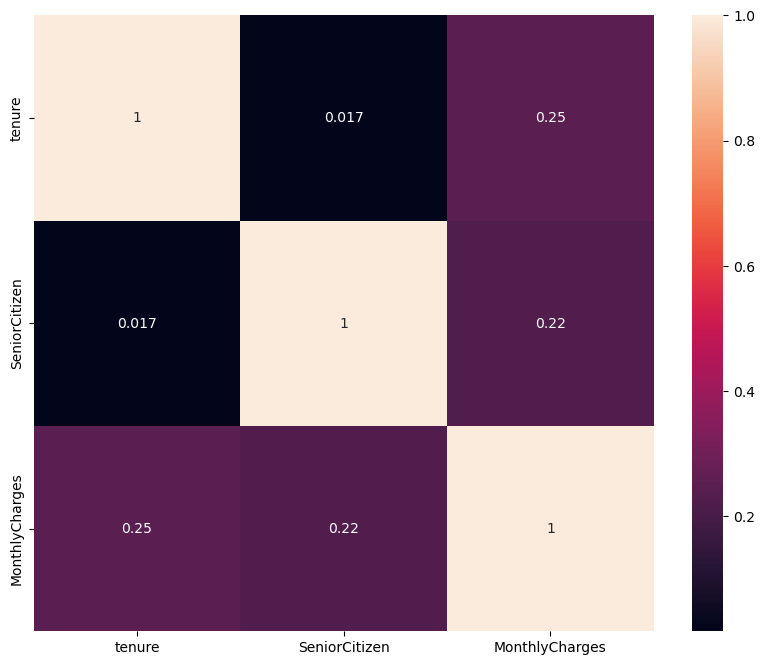

In [15]:
corr_matrix=df2.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

 - Evaluate the model

In [19]:
#https://intellipaat.com/blog/confusion-matrix-python/#Implementing
X = pd.DataFrame(df2.iloc[:,:-1])
y = pd.DataFrame(df2.iloc[:,-1])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [22]:
logmodel = LogisticRegression ()
print(logmodel.fit(X_train, y_train))

LogisticRegression()


In [23]:
y_pred = logmodel.predict(X_test)

In [24]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[955 106]
 [182 166]]


In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.84      0.90      0.87      1061
         Yes       0.61      0.48      0.54       348

    accuracy                           0.80      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.78      0.80      0.79      1409



 - Even a simple model will give us more than 70% accuracy. Why?

The accuracy is indeed over 70%. Maybe it is because we have been training our model with a lot more No than Yes ?

 - Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [28]:
from imblearn.over_sampling import SMOTE

In [29]:
#https://colab.research.google.com/drive/1-YWmoqul4VRsmkluZqjxEBNuRD627qch#scrollTo=4Cb2gp_WRx7t
smote = SMOTE()
X = df2[['tenure', 'SeniorCitizen','MonthlyCharges']]
transformer = StandardScaler().fit(X)
X = transformer.transform(X)
y = df2['Churn']
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

No     5174
Yes    5174
Name: Churn, dtype: int64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=100)
classification = LogisticRegression(random_state=0, multi_class='ovr').fit(X_train, y_train)
predictions = classification.predict(X_test)

classification.score(X_test, y_test)

0.7471819645732689

 - Apply imblearn.under_sampling.TomekLinks to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [35]:
from imblearn.under_sampling import TomekLinks

In [47]:
tl = TomekLinks()

X_train_res, y_train_res = tl.fit_resample(X_train, y_train)
display(y_train_res.value_counts)

<bound method IndexOpsMixin.value_counts of 0        No
1        No
2       Yes
3       Yes
4        No
       ... 
6832     No
6833     No
6834    Yes
6835    Yes
6836    Yes
Name: Churn, Length: 6837, dtype: object>

In [48]:
X_tl, y_tl = tl.fit_resample(X, y)
y_tl.value_counts()

No     4697
Yes    1869
Name: Churn, dtype: int64

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl, test_size=0.3, random_state=100)
classification = LogisticRegression(random_state=0, multi_class='ovr').fit(X_train, y_train)
predictions = classification.predict(X_test)

classification.score(X_test, y_test)

0.8040609137055837

***

The accuracy is better with Tome. So this one is better to make predictions when handling imbalanced data.

***